# GRIP : THE SPARKS FOUNDATION

# Data Science and Business Analytics Internship

# Author: MADHUSHREE T

# Task 1 : Prediction using Supervised Machine Learning

In this task it is required to predict the percentage of a student on the basis of number of hours studied using the Linear Regression supervised machine learning algorithm.

**Steps:**
- Step 1 - Importing packages
- Step 2 - Importing the dataset
- Step 3 - Visualizing the dataset
- Step 4 - Data preparation
- Step 5 - Training the algorithm
- Step 6 - Visualizing the model
- Step 7 - Making predcitions
- Step 8 - Evaluating the model

# STEP 1 - Importing packages

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP 2 - Importing the dataset

In [117]:
# Reading data from remote link

url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [118]:
# now let's observe the dataset 
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [119]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [120]:
# To find the number of columns and rows
df.shape

(25, 2)

In [121]:
# To find more information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [122]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [123]:
# now we will check if our dataset contains null or missings values 
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# STEP 3 - Visualizing the dataset

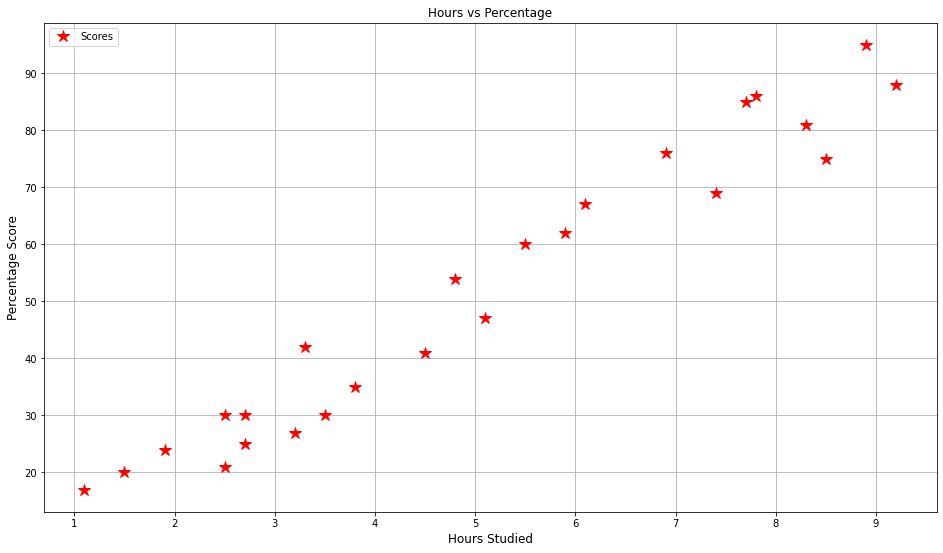

In [124]:
#Plot the datapoints using Matplotlib
plt.rcParams["figure.figsize"] =[16,9]
df.plot(x="Hours",y="Scores",color="Red",style="*",markersize=12)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied',size=12)
plt.ylabel('Percentage Score',size=12)
plt.grid()
plt.show()


**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [125]:
# we can also use .corr to determine the corelation between the variables 
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [126]:
hours= df['Hours']
Scores=df['Scores']

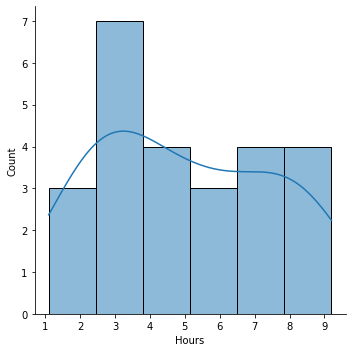

In [127]:
sns.displot(hours,kde=True)

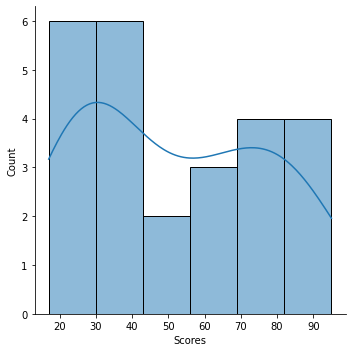

In [128]:
sns.displot(Scores,kde=True)

# STEP 4 - Data preparation

In this step we will divide the data into "features" (inputs) and "labels" (outputs). After that we will split the whole dataset into 2 parts - testing data and training data.

In [129]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [130]:
#using iloc function we will divide the data
X= df.iloc[:,:1].values
y=df.iloc[:,1:].values

In [131]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [132]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [133]:
#Splitting data into training and testing data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)


# STEP 5 - Training the Algorithm

In [134]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# STEP 6 - Visualizing the model

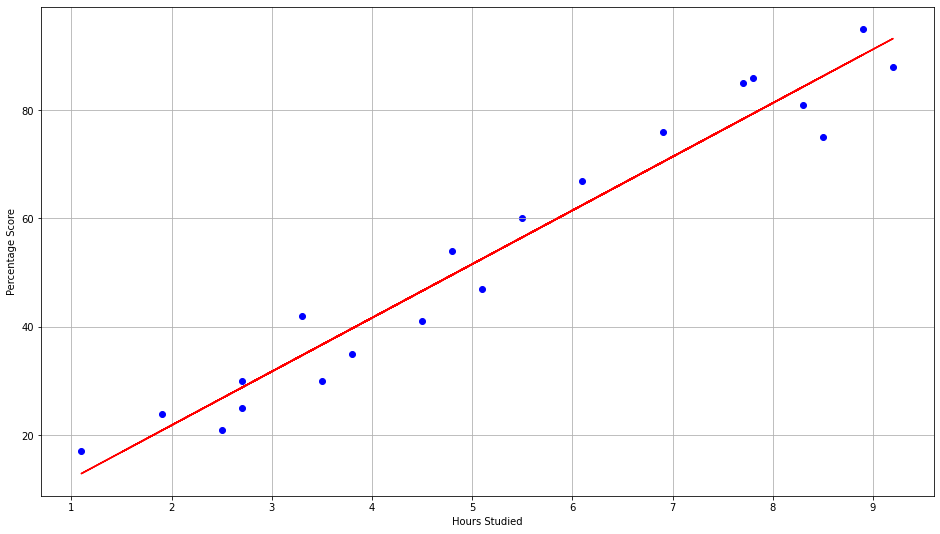

In [135]:
line= model.coef_*X + model.intercept_

#plotting for the training data
plt.scatter(X_train,y_train,color="blue")
plt.plot(X,line,color ='red')
plt.xlabel("Hours Studied")
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

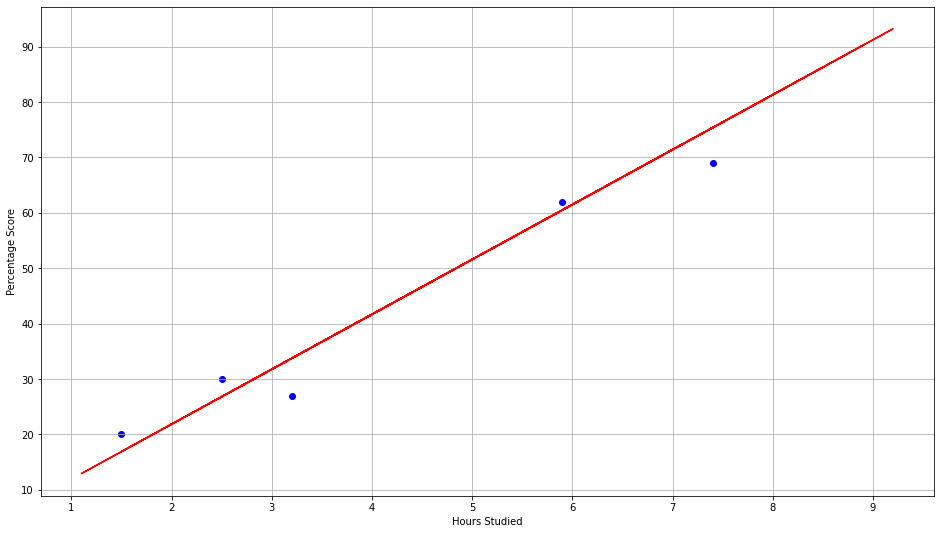

In [136]:
#plotting for the testing data
plt.scatter(X_test,y_test,color="blue")
plt.plot(X,line,color="red")
plt.xlabel("Hours Studied")
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

# STEP 7 - Making Predictions

In [137]:
print(X_test)
y_pred= model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [138]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [139]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [142]:
#comparing Actual vs Predicted
df= pd.DataFrame({'Actual':[i[0] for i in y_test],'Predicted':[k for k in y_pred]})
df

,Actual,Predicted
0,20,[16.884144762398027]
1,27,[33.732260779489835]
2,69,[75.35701799818723]
3,30,[26.794801243040265]
4,62,[60.49103327722388]


In [143]:
#Testing with your own data

hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


Hence, it can be concluded that the predicted score if a person studies for **9.25 hours** is **93.69173248737535**

# STEP 7 - Evaluating the model

In [144]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.18385989900298
